# File and libraries

In [30]:
import pandas as pd
import numpy as np


filepath=r'dataset/df_msg_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

sample_filepath=f"{filepath}_sample.csv"
test_sample_filepath=f"{filepath}_test_sample.csv"
train_sample_filepath=f"{filepath}_train_sample.csv"

file_tag = "Ecom Multichannel messages"

# DSLabs functions

In [31]:
%run "scripts/dslabs_functions.py"


# Data functions

In [32]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [33]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample to test setup
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)

    
else:
    # data=pd.read_csv(f"{filepath}.csv")  
    # test= pd.read_csv(test_filepath)
    # train= pd.read_csv(train_filepath)

    # use 10% sample file when heavy processing
    data=pd.read_csv(sample_filepath)
    test= pd.read_csv(test_sample_filepath)
    train= pd.read_csv(train_sample_filepath)
 
 
target='is_clicked'
target_metric='f2'
vars: list[str] = data.columns.to_list()
labels: list = list(data[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97779 entries, 0 to 97778
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   platform                      97779 non-null  float64
 1   email_provider                97779 non-null  float64
 2   campaign_type                 97779 non-null  float64
 3   channel_cmp                   97779 non-null  float64
 4   topic                         97779 non-null  float64
 5   total_count                   97779 non-null  float64
 6   subject_length                97779 non-null  float64
 7   day_of_year                   97779 non-null  float64
 8   month                         97779 non-null  float64
 9   hour_sin                      97779 non-null  float64
 10  hour_cos                      97779 non-null  float64
 11  min_sin                       97779 non-null  float64
 12  min_cos                       97779 non-null  float64
 13  day_of

# Distribution Check

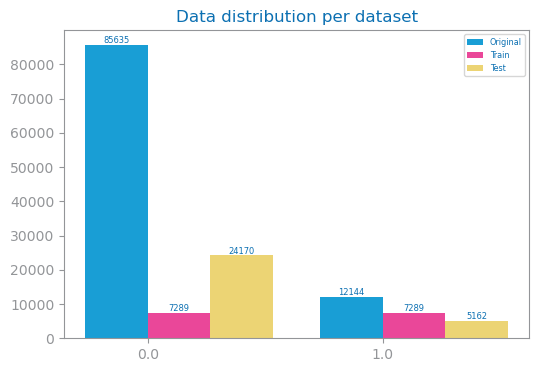

In [34]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Original": [
        len(data[data[target] == 0]),  # Assuming 0 is the negative class
        len(data[data[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

# eval prep

In [35]:
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

Train#=14578 Test#=29332
Labels=[0.0, 1.0]


2500,500 inicialmente, recall a 100%
2000,200 - okei
2000,50
10 000, 500


In [36]:
max_iter_eval=3000 #2500 inicialmente, demasiado recall 2000 pode ser pouco . NN sao boas com dados continuos. Grad des: se tiver um learning rate pequeno, e treinar suficientemente, 
lag_eval=50 #500 inicialmente #ler para mudar o learning rate. 
#learning_rates_eval: list[float] = [0.0000001, 0.00000001, 0.000000000001]

# f2 evaluate

## f2 study

MLP lr_type=constant lr=0.5 n=50
MLP lr_type=constant lr=0.5 n=100
MLP lr_type=constant lr=0.5 n=150
MLP lr_type=constant lr=0.5 n=200
MLP lr_type=constant lr=0.5 n=250
MLP lr_type=constant lr=0.5 n=300
MLP lr_type=constant lr=0.5 n=350
MLP lr_type=constant lr=0.5 n=400
MLP lr_type=constant lr=0.5 n=450
MLP lr_type=constant lr=0.5 n=500
MLP lr_type=constant lr=0.5 n=550
MLP lr_type=constant lr=0.5 n=600
MLP lr_type=constant lr=0.5 n=650
MLP lr_type=constant lr=0.5 n=700
MLP lr_type=constant lr=0.5 n=750
MLP lr_type=constant lr=0.5 n=800
MLP lr_type=constant lr=0.5 n=850
MLP lr_type=constant lr=0.5 n=900
MLP lr_type=constant lr=0.5 n=950
MLP lr_type=constant lr=0.5 n=1000
MLP lr_type=constant lr=0.5 n=1050
MLP lr_type=constant lr=0.5 n=1100
MLP lr_type=constant lr=0.5 n=1150
MLP lr_type=constant lr=0.5 n=1200
MLP lr_type=constant lr=0.5 n=1250
MLP lr_type=constant lr=0.5 n=1300
MLP lr_type=constant lr=0.5 n=1350
MLP lr_type=constant lr=0.5 n=1400
MLP lr_type=constant lr=0.5 n=1450
MLP l

<Figure size 640x480 with 0 Axes>

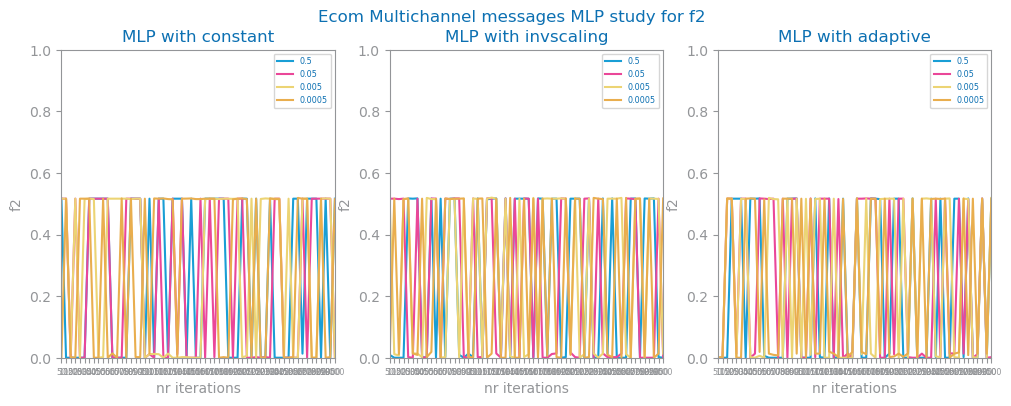

In [37]:

figure()

best_model_f2, f2_params = mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=max_iter_eval,
    lag=lag_eval,
    #learning_rates=learning_rates_eval,
    metric='f2',
    file_tag = file_tag
)
savefig(f"images/{file_tag}_mlp_{f2_params['metric']}_study.png")
show()

## f2 best model

<Figure size 640x480 with 0 Axes>

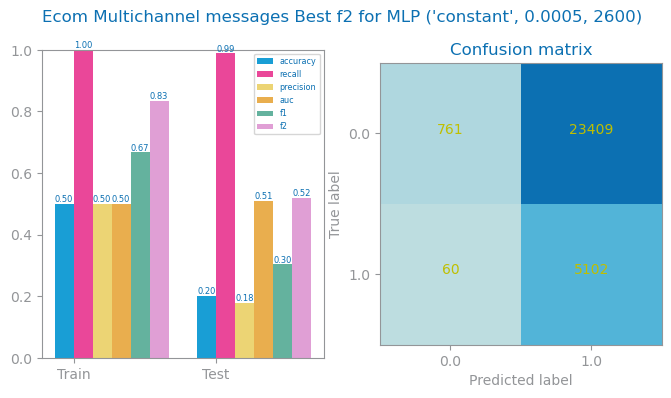

In [38]:
prd_trn: array = best_model_f2.predict(trnX)
prd_tst: array = best_model_f2.predict(tstX)
figure()
plot_evaluation_results(f2_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_mlp_{f2_params["name"]}_best_{f2_params["metric"]}_eval.png')
show()

## f2 Overfitting

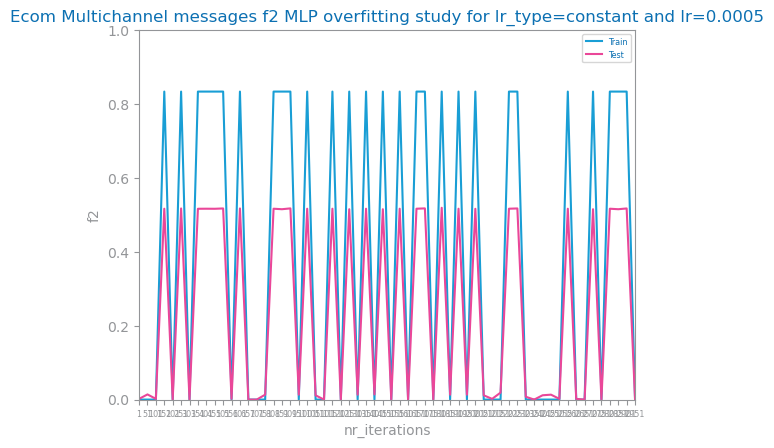

In [39]:
lr_type: Literal["constant", "invscaling", "adaptive"] = f2_params["params"][0]
lr: float = f2_params["params"][1]
nr_iterations: list[int] = [i for i in range(1, max_iter_eval, lag_eval)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
eval_metric = f2_params['metric']

warm_start: bool = False
for n in nr_iterations:
    clf = MLPClassifier(
        warm_start=warm_start,
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="sgd",
        verbose=False,
    )
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[eval_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[eval_metric](trnY, prd_trn_Y))
    warm_start = True

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"{file_tag} {eval_metric} MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/{file_tag}_mlp_{eval_metric}_overfitting.png")

# loss curve

In [40]:
print(best_model_f2.loss_curve_)

[0.7147068161173673, 0.6932988857218455, 0.6932048664808266, 0.6932537751905837, 0.6932150694942244, 0.6932379518917655, 0.6932852739739107, 0.6932183954343383, 0.6932315824661911, 0.6932188977890752, 0.6933324147471354, 0.6931733507430107, 0.693199079729975]


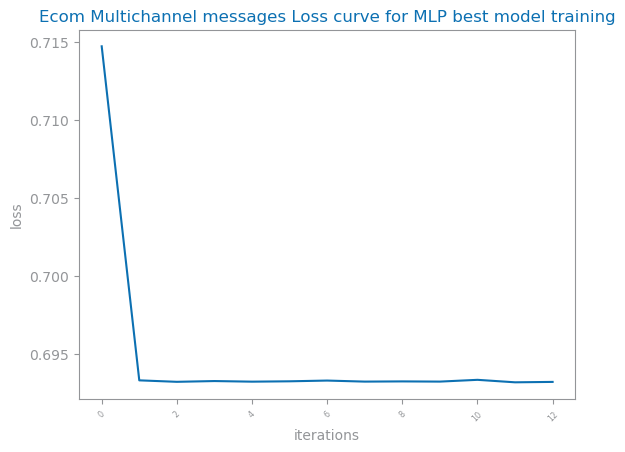

In [41]:
from numpy import arange
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart

if best_model_f2 and hasattr(best_model_f2, "loss_curve_") and len(best_model_f2.loss_curve_) > 0:
    plt.figure()
    plot_line_chart(
        arange(len(best_model_f2.loss_curve_)),
        best_model_f2.loss_curve_,
        title=f"{file_tag} Loss curve for MLP best model training",
        xlabel="iterations",
        ylabel="loss",
        percentage=False,
    )
    plt.savefig(f"images/{file_tag}_mlp_{'metric'}_loss_curve.png")
else:
    print("No loss curve data available to plot.")


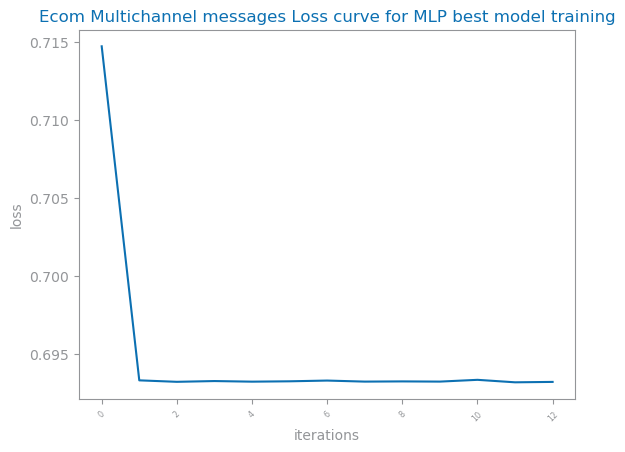

In [42]:
from numpy import arange
from numpy import argsort
from dslabs_functions import plot_line_chart


#loss_curve = best_model_f2.loss_curve_
#indices: list[int] = argsort(loss_curve)[::-1]
#elems: list[str] = []
#imp_values: list[float] = []
#for f in range(len(vars)):
#    elems += [vars[indices[f]]]
#    imp_values += [loss_curve[indices[f]]]
#    print(f"{f+1}. {elems[f]} ({loss_curve[indices[f]]})")

figure()
plot_line_chart(
    arange(len(best_model_f2.loss_curve_)),
    best_model_f2.loss_curve_,
    title=f"{file_tag} Loss curve for MLP best model training",
    xlabel="iterations",
    ylabel="loss",
    percentage=False,
)
savefig(f"images/{file_tag}_mlp_{eval_metric}_loss_curve.png")